In [12]:
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
from DensiTDA import landmarktools

# Generate a random dataset

In [2]:
a_1 = [2,1]
a_2 = [4,3]
a_3 = [7,10]
a_4 = [9,13]
cov = np.array([[2,1],[1,2]])

In [3]:
X_1 = np.random.multivariate_normal(a_1, 1 * cov, 1000)
X_2 = np.random.multivariate_normal(a_2, 0.7 * cov, 500)
X_3 = np.random.multivariate_normal(a_3, cov, 200)
X_4 = np.random.multivariate_normal(a_4, cov, 100)

X = np.concatenate((X_1, X_2, X_3, X_4), axis=0)

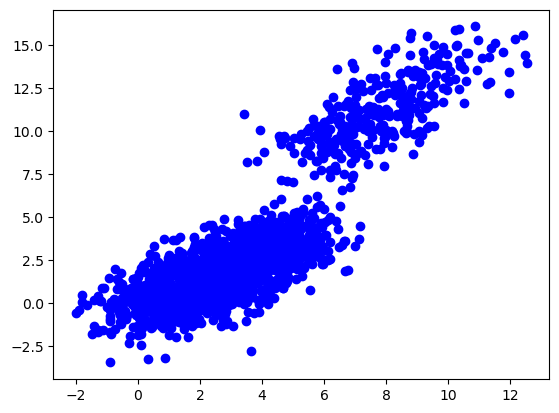

In [4]:
plt.scatter(X[:,0], X[:,1], color="blue")
plt.show()

# Run Max of Gaussians Landmarking Selection Algorithm

In [5]:
# hyperparameters
d = X.shape[1]
h = np.std(X) * (len(X)) ** (-1 / (d + 4))
A = np.ones(len(X)) / (h * len(X))
s = 0.8
candidate_landmarks = X

In [7]:
chosen_landmarks, chosen_powers = landmarktools.optimal_convex_landmarking(X, A, h, s)

Calculating Projections p(x)


100%|██████████████████████████████████████| 1800/1800 [00:09<00:00, 181.34it/s]


Calculating tilde f(y)


100%|██████████████████████████████████████| 1800/1800 [00:07<00:00, 248.72it/s]


Greedy algorithm


100%|█████████████████████████████████████| 1800/1800 [00:00<00:00, 8214.03it/s]


In [8]:
len(chosen_landmarks) / len(X)

0.05

# Result of Max of Gaussians 

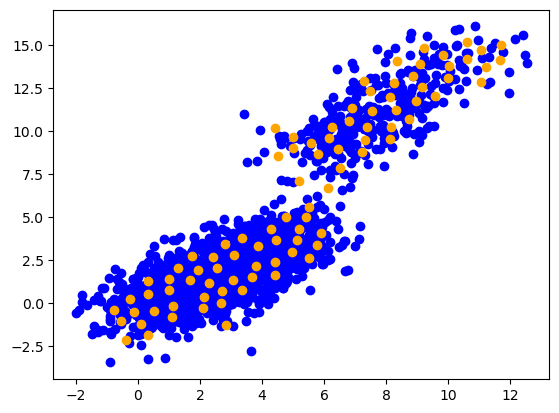

In [9]:
chosen_landmarks = np.array(chosen_landmarks)

plt.scatter(X[:,0], X[:,1], color="blue")
plt.scatter(chosen_landmarks[:,0], chosen_landmarks[:,1], color="orange")
plt.show()

In [10]:
print("Precentage of points selected: ", 100 * len(chosen_landmarks) / len(X))

Precentage of points selected:  5.0


Initializing Distrbution over Candidate Landmark Points:


100%|████████████████████████████████████████| 180/180 [00:01<00:00, 174.97it/s]


Maximizing Gaussians over Landmark Points:


100%|█████████████████████████████████████| 1800/1800 [00:00<00:00, 2140.14it/s]


ValueError: Contour levels must be increasing

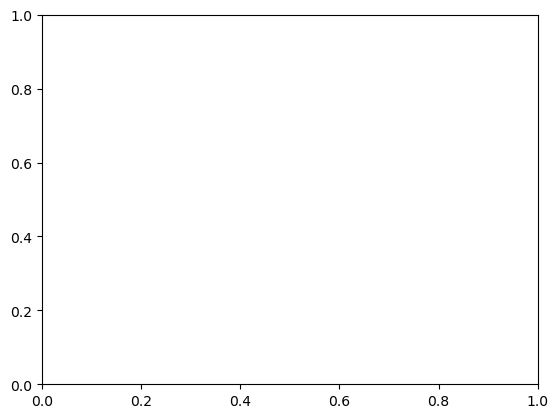

In [11]:
landmarktools.max_of_gaussians_2D_plot(X, A, candidate_landmarks, h, s, cut_off = 0.3)